## CNN Deteccion de Covid


### Importamos librerias necesarias

In [ ]:
import zipfile
import io
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import files
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import drive #conexion con drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importamos y Descomprimimos el dataset en la carpeta content
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CNN/archive.zip", 'r')
zip_ref.extractall("/content/drive/MyDrive/CNN")
zip_ref.close()

In [ ]:
train_data_dir = '/content/drive/MyDrive/CNN/xray_dataset_covid19/train'
validation_data_dir = '/content/drive/MyDrive/CNN/xray_dataset_covid19/test'

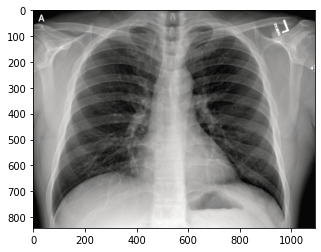

In [ ]:
plt.imshow(cv2.imread("/content/drive/MyDrive/CNN/xray_dataset_covid19/train/PNEUMONIA/nejmoa2001191_f1-PA.jpeg"))

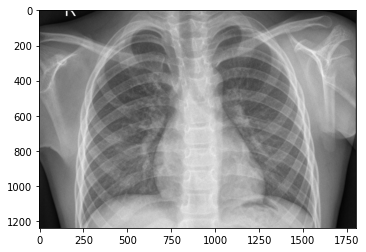

In [ ]:
plt.imshow(cv2.imread("/content/drive/MyDrive/CNN/xray_dataset_covid19/train/NORMAL/IM-0015-0001.jpeg"))

In [ ]:
#iniciamos un generados de datos de imagenes y las reescalamos 
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
# preprocesamos las imagenes en un tamaño 100*100 a una escala de grises para el entrenamiento
train_generator = train_data_gen.flow_from_directory(
        train_data_dir,
        target_size=(100, 100),
        batch_size=32,
        class_mode='binary')

Found 148 images belonging to 2 classes.


In [ ]:
# preprocesamos las imagenes en un tamaño 100*100 a una escala de grises para evaluar el modelo
validation_generator = validation_data_gen.flow_from_directory(
        validation_data_dir,
        target_size=(100, 100),
        batch_size=32,        
        class_mode='binary')

Found 40 images belonging to 2 classes.


In [ ]:
#creamos el modelo de red neuronal con activacion relu y capa de salida sigmoid
covid_model1 = Sequential()

covid_model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)))
covid_model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
covid_model1.add(MaxPooling2D(pool_size=(2, 2)))
covid_model1.add(Dropout(0.25))

covid_model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
covid_model1.add(MaxPooling2D(pool_size=(2, 2)))
covid_model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
covid_model1.add(MaxPooling2D(pool_size=(2, 2)))
covid_model1.add(Dropout(0.25))

covid_model1.add(Flatten())
covid_model1.add(Dense(128, activation='relu'))
covid_model1.add(Dropout(0.5))
covid_model1.add(Dense(1, activation='sigmoid'))

cv2.ocl.setUseOpenCL(False)

In [ ]:
#
covid_model1.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

In [ ]:
# entrenamos la red neuronal 
covid_model_info1 = covid_model1.fit_generator(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
                  )

<ipython-input-29-30c07f4d28fb>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  covid_model_info1 = covid_model1.fit_generator(


Epoch 1/50
5/5 [==============================] - 10s 2s/step - loss: 0.7127 - accuracy: 0.5203 - val_loss: 0.6839 - val_accuracy: 0.5000
Epoch 2/50
5/5 [==============================] - 8s 1s/step - loss: 0.6772 - accuracy: 0.6081 - val_loss: 0.6795 - val_accuracy: 0.5750
Epoch 3/50
5/5 [==============================] - 8s 2s/step - loss: 0.6676 - accuracy: 0.6014 - val_loss: 0.6735 - val_accuracy: 0.6250
Epoch 4/50
5/5 [==============================] - 8s 1s/step - loss: 0.6775 - accuracy: 0.5878 - val_loss: 0.6653 - val_accuracy: 0.9000
Epoch 5/50
5/5 [==============================] - 9s 2s/step - loss: 0.6409 - accuracy: 0.7027 - val_loss: 0.6579 - val_accuracy: 0.8000
Epoch 6/50
5/5 [==============================] - 8s 1s/step - loss: 0.6578 - accuracy: 0.6216 - val_loss: 0.6483 - val_accuracy: 0.9750
Epoch 7/50
5/5 [==============================] - 9s 2s/step - loss: 0.6267 - accuracy: 0.7095 - val_loss: 0.6358 - val_accuracy: 0.9500
Epoch 8/50
5/5 [========================

In [ ]:
image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/CNN/xray_dataset_covid19/Validation/NonCovid/NORMAL2-IM-0145-0001.jpeg',target_size=(100,100))

In [ ]:
image2 = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/CNN/xray_dataset_covid19/Validation/Covid/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day2.jpg',target_size=(100,100))

In [ ]:
input_arr = tf.keras.preprocessing.image.img_to_array(image)

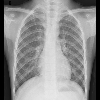

In [ ]:
image

In [ ]:
input_arr = np.array([input_arr])  # Convert single image to a batch.
if covid_model1.predict(input_arr) == 1:
    print ("COVID Positive")
else:
    print ("Normal")

1/1 [==============================] - 0s 88ms/step
Normal


In [ ]:
input_arr1 = tf.keras.preprocessing.image.img_to_array(image2)

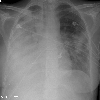

In [ ]:
image2

In [ ]:
input_arr1 = np.array([input_arr1])  # Convert single image to a batch.
if covid_model1.predict(input_arr1) == 1:
    print ("COVID Positive")
else:
    print ("Normal")

1/1 [==============================] - 0s 23ms/step
COVID Positive
